In [1]:
# Additional python packages
import os, urllib, io, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from functions import polar_coord, get_classes, get_wrinkle_class # Our functions 

### Plot image

Let's choose this picture to work with

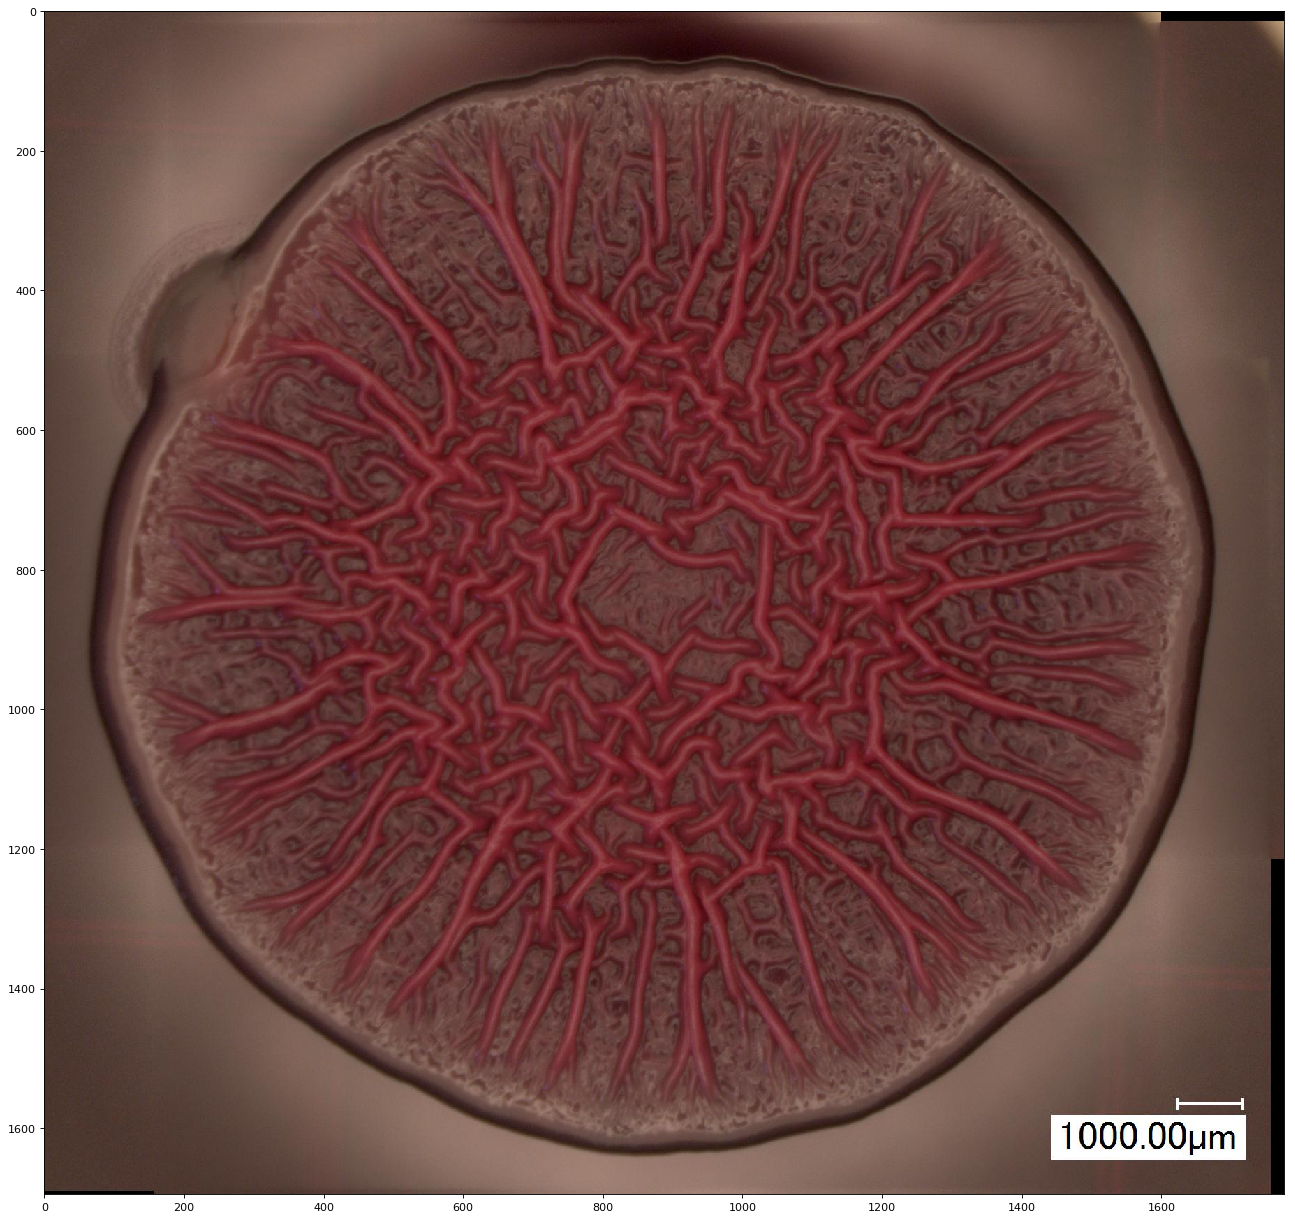

In [2]:
filename = 'Keyence/phz_170725_D3.jpg'
img = Image.open(filename)
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img)


### Transform image to polar coordinates

We can see that the   “spokes” now appear to be horizontal lines when plotted using polar coordinates.

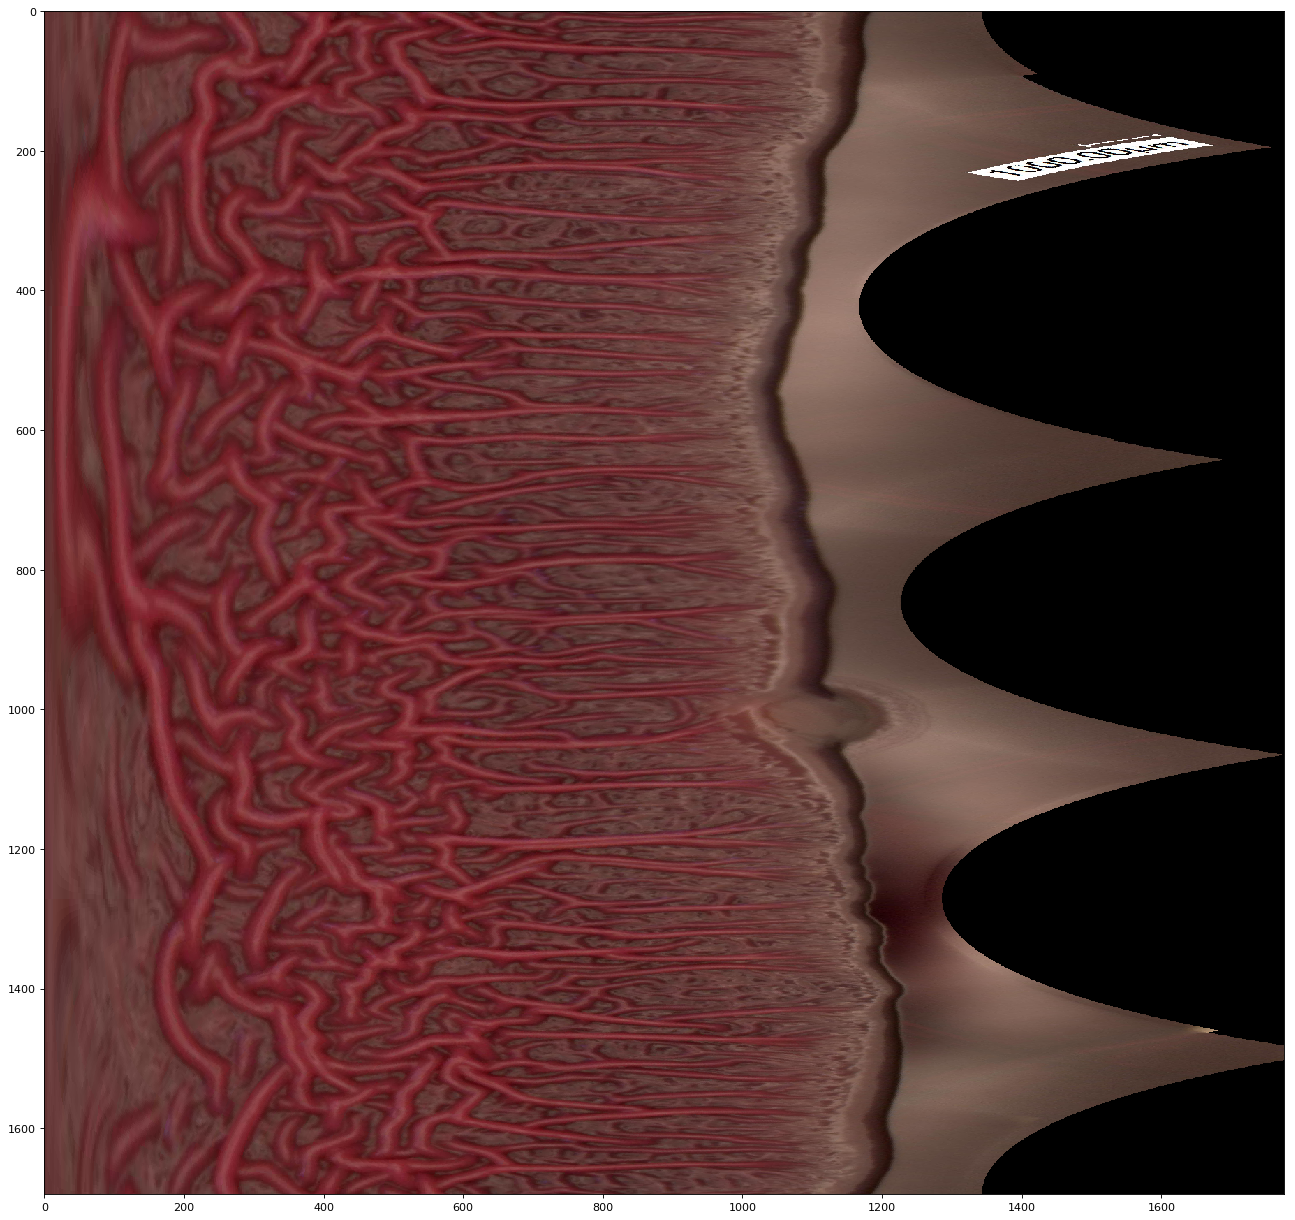

In [3]:
img_array=np.asarray(img)# transform into array
polar_img=polar_coord(img_array)
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(polar_img)

## Demo added functions

I created the function get_classes  and get_wrinkle_class with the help of Isaac's code, you can use my example to see how they work.

##### Plot classes using get_wrinkle_class

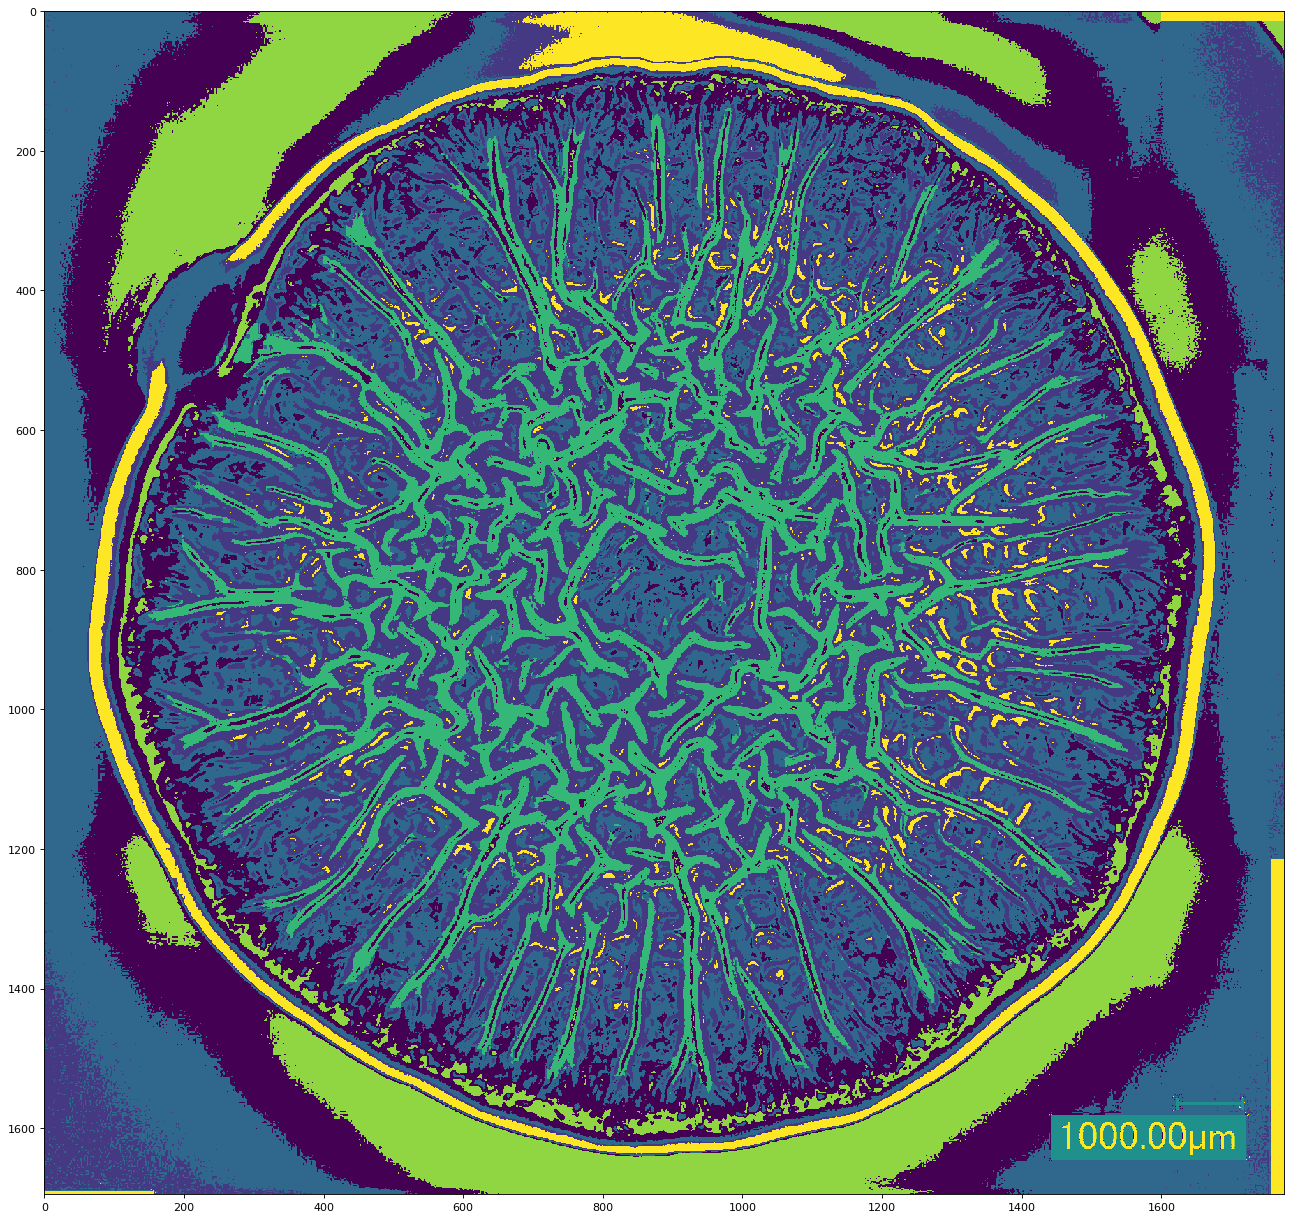

In [4]:
img_classes=get_classes(img)[1]
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img_classes)

##### Plot wrinkle class using get_wrinkle_class

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning:

'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.



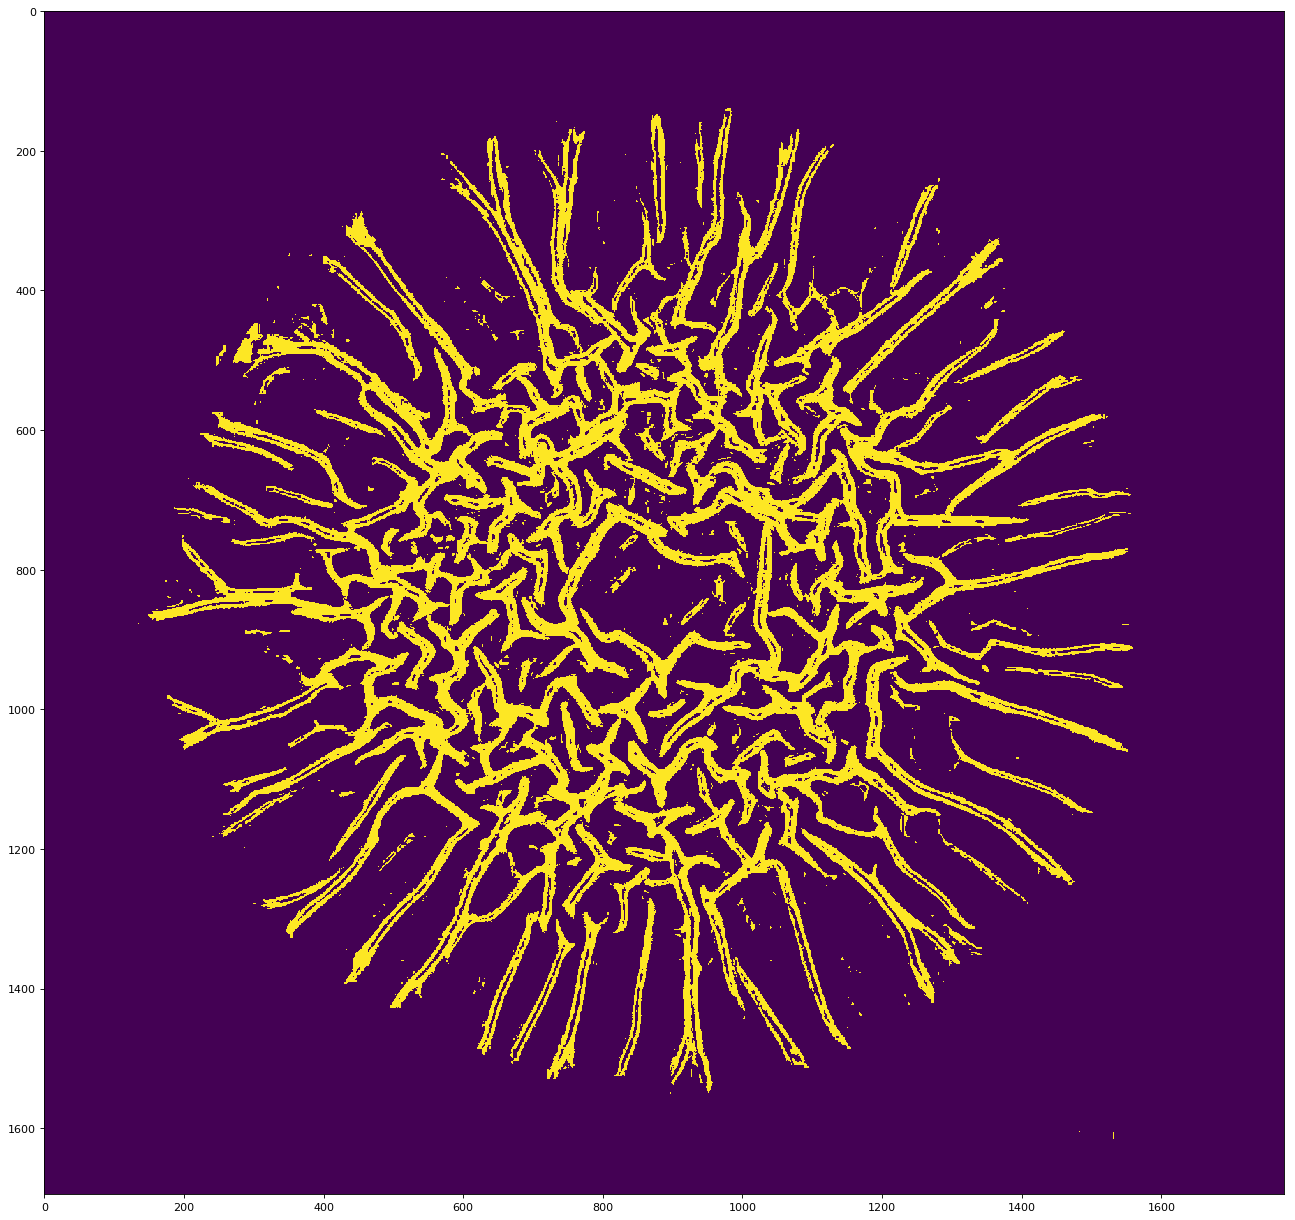

In [5]:
wrinkle_labels,img_wrinkle_class=get_wrinkle_class(img)
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img_wrinkle_class)

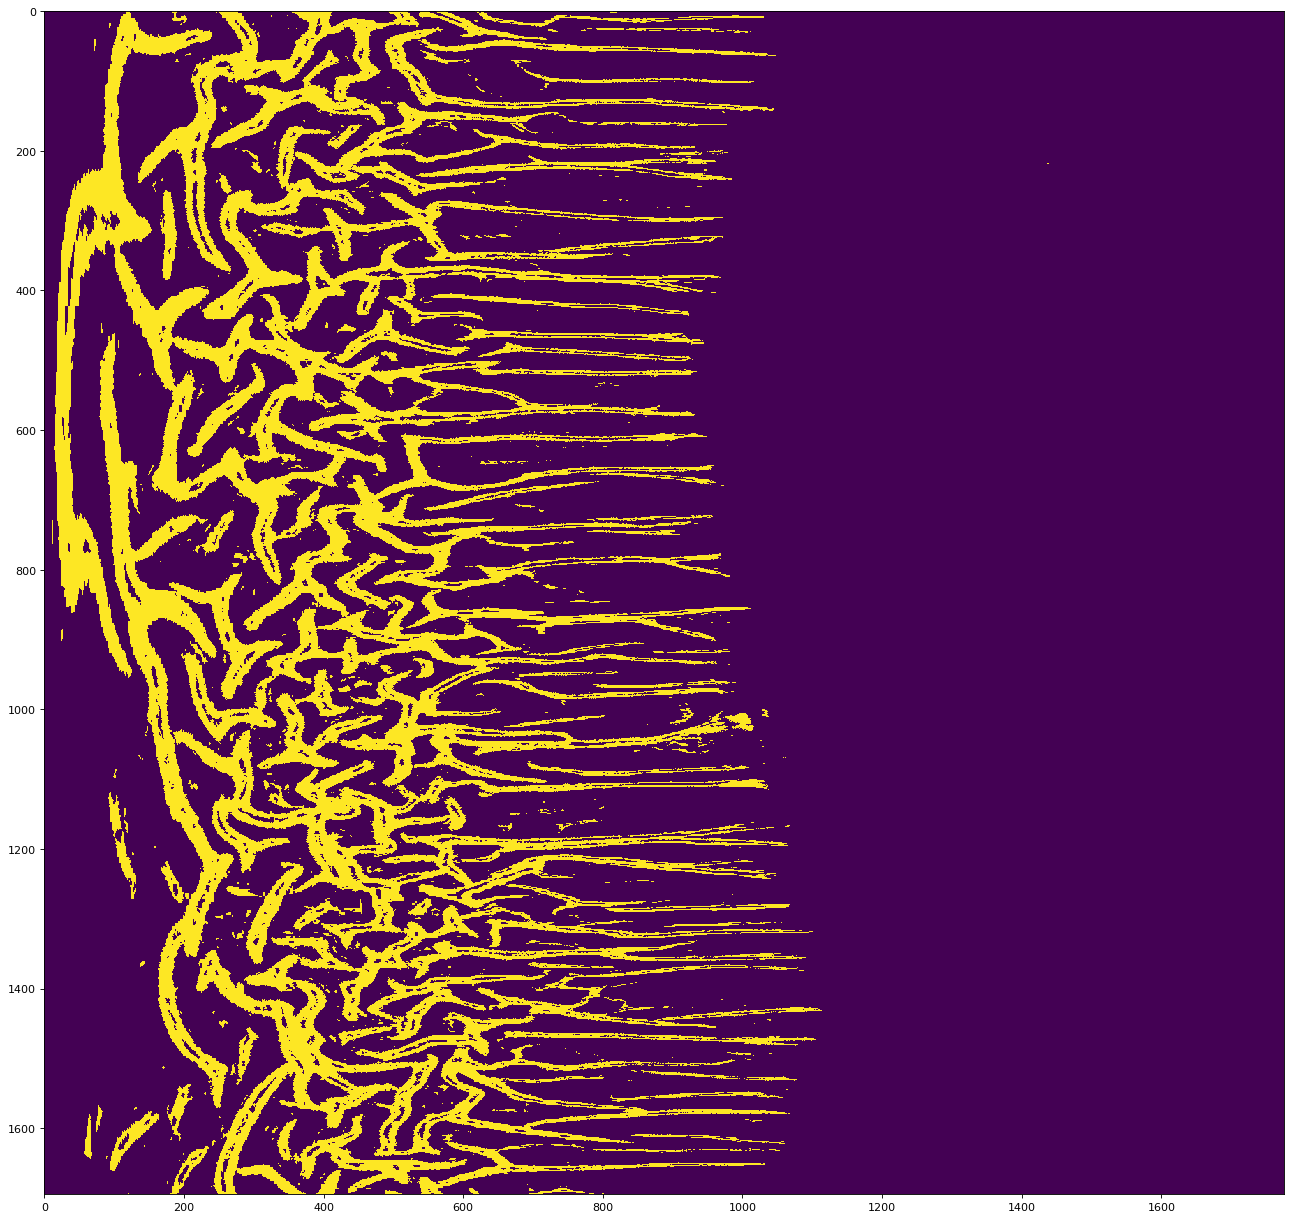

In [6]:
# transform into array
polar_img_wrinkle=polar_coord(img_wrinkle_class)
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(polar_img_wrinkle)

### Detect straight lines

To detect straight lines within the wrinkle class using polar_image_wrinkle

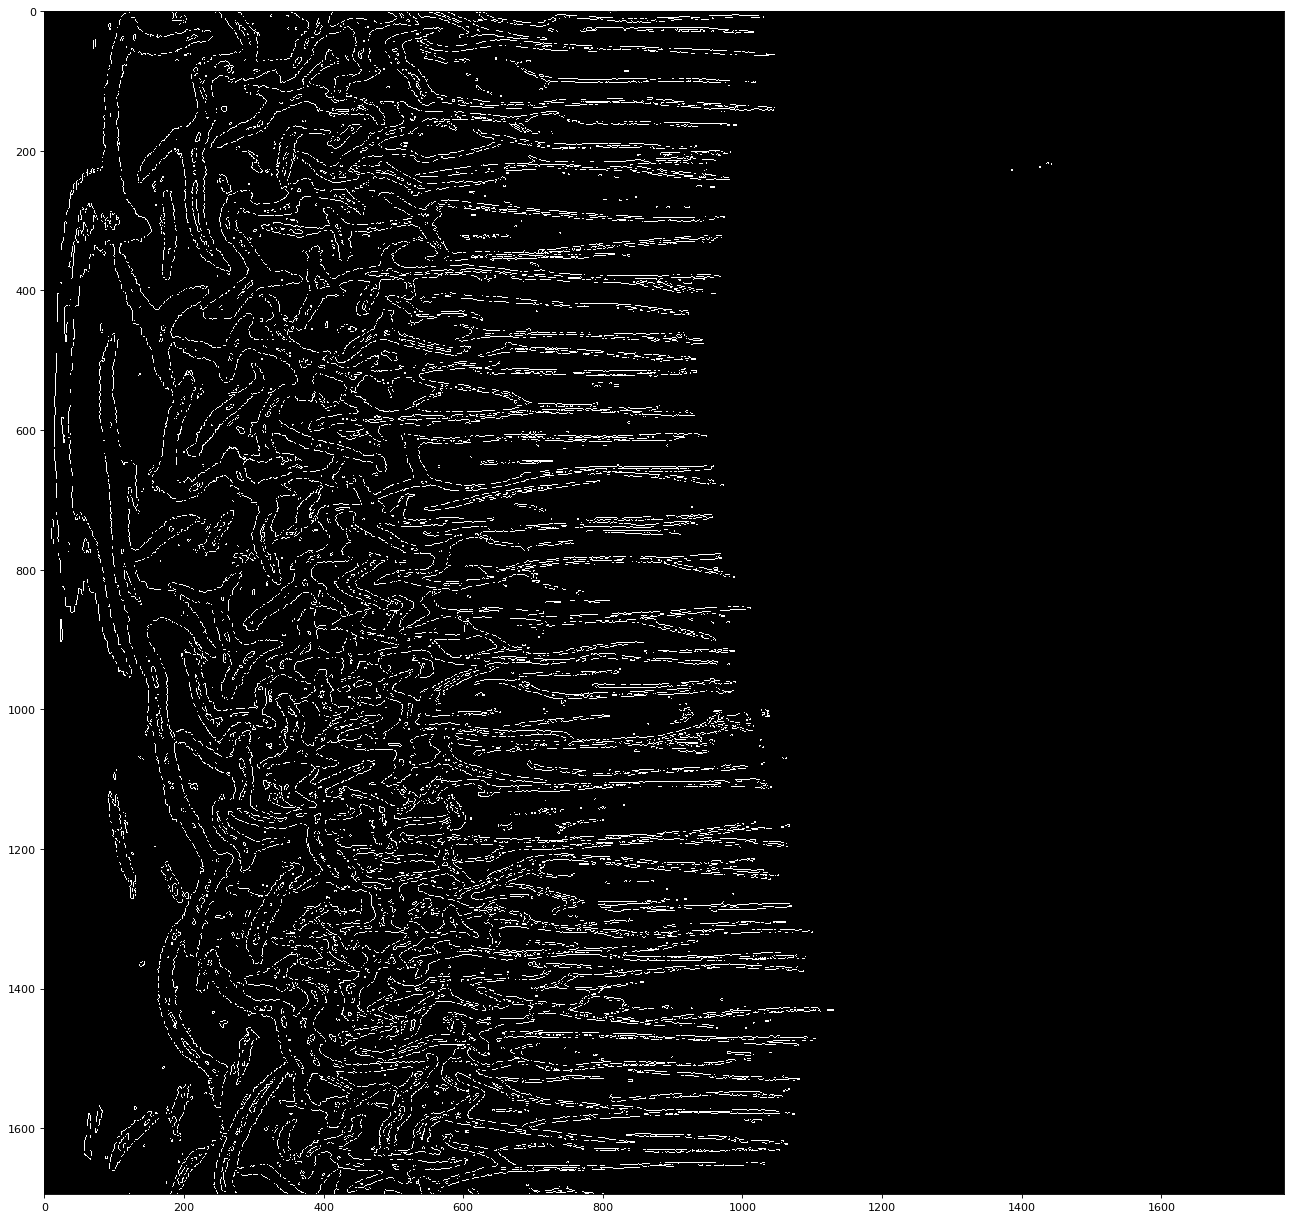

In [7]:
#img_red = polar_img[:,:,0]
#img_red = np.reshape(img_red, (img_red.shape[0], -1))
#plt.imshow(img_red,cmap='gray')
edges = cv2.Canny(polar_img_wrinkle,40,70) 
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(edges,cmap='gray')
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=150, minLineLength=200,maxLineGap=30)

In [8]:
for line in lines:
    coords=line[0]
    slope=(coords[3]-coords[1])/(coords[2]-coords[0])
    if slope > -0.2 and slope <0.2:
        cv2.line(polar_img,(coords[0],coords[1]),(coords[2],coords[3]),[255,255,255],3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in int_scalars



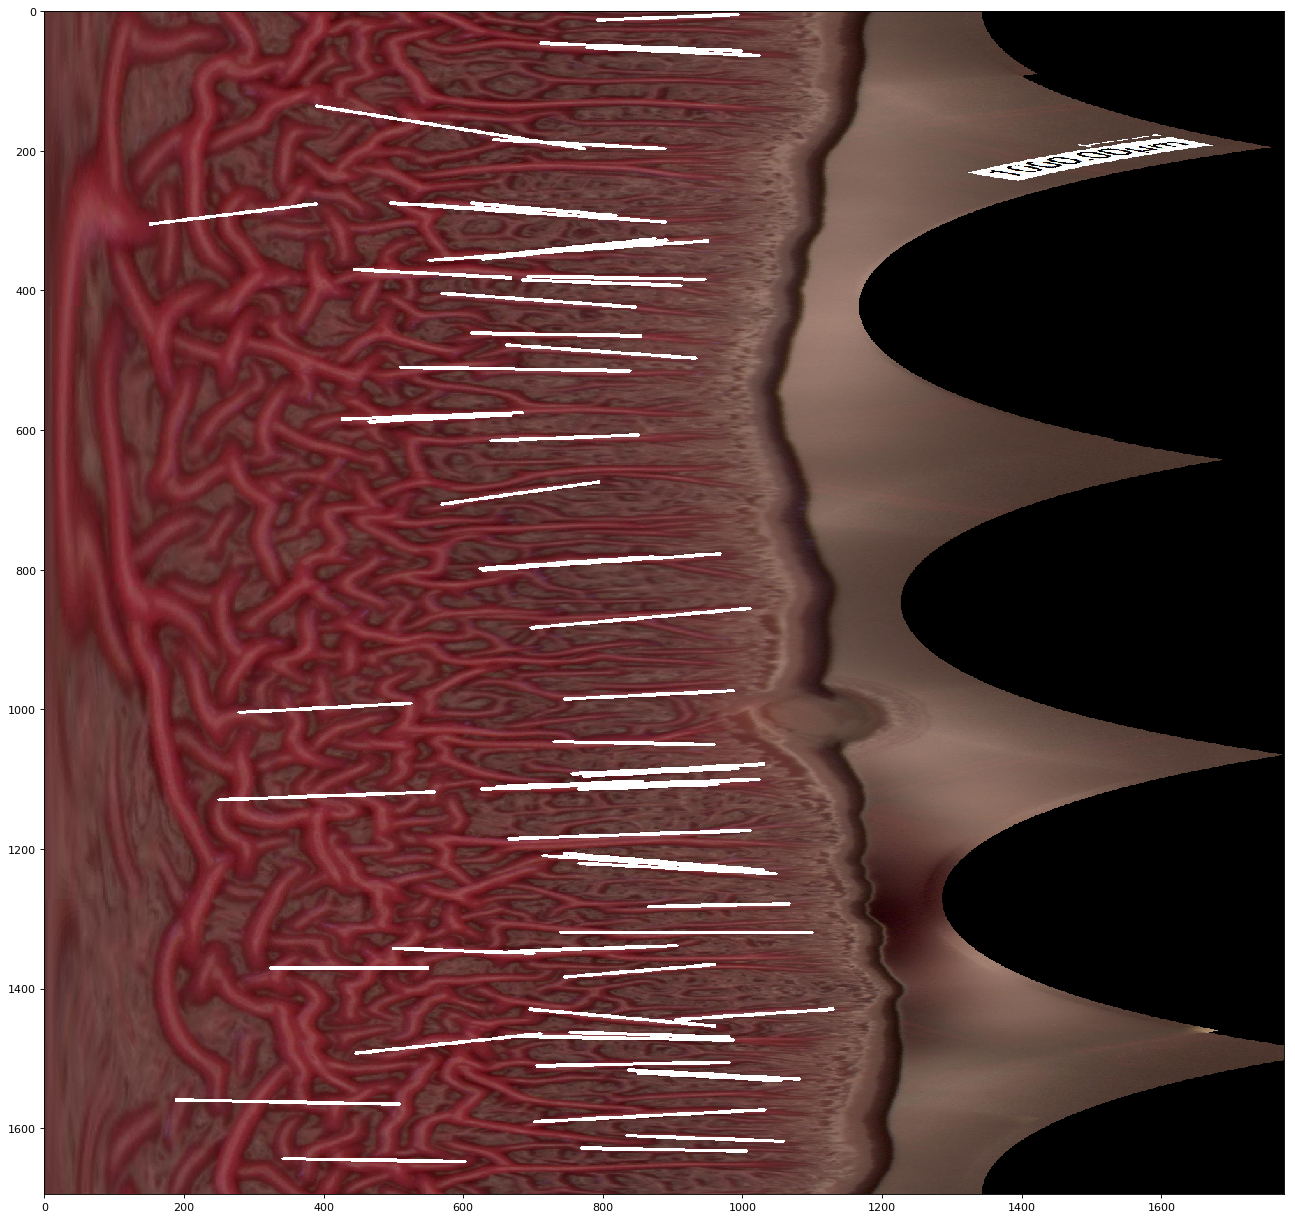

In [9]:
plt.figure(num=None, figsize=(20, 20), dpi=80,facecolor='w', edgecolor='k')
plt.imshow(polar_img)